# 1. tensorflow v2.xx에서 v1사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd


Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run() 을 통해 값을 확인

In [2]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [3]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1,node2,node3]))

[10.0, 20.0, 30.0]


In [4]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1,node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [5]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1.,2.,3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [6]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([1]) # 평균 0, 표준편차가 1인 난수 실수 2개(정규분포이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([-1.236682], dtype=float32), array([0.79298866], dtype=float32)]

In [7]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([1.6971058], dtype=float32)

# 2. tensorflow v1 을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [8]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
#cost function(손실함수 = mse; 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프, 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer

'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:3.6439521312713623, W:[1.8223052], b:[0.91541713]
200번째 cost:0.00769715616479516, W:[1.1016518], b:[0.7689211]
400번째 cost:0.002939147176221013, W:[1.0628147], b:[0.8572074]
600번째 cost:0.0011223087785765529, W:[1.0388156], b:[0.9117629]
800번째 cost:0.0004285587929189205, W:[1.0239859], b:[0.9454745]
1000번째 cost:0.0001636416418477893, W:[1.0148216], b:[0.9663069]
1200번째 cost:6.248709541978315e-05, W:[1.009159], b:[0.97917956]
1400번째 cost:2.386130472586956e-05, W:[1.0056598], b:[0.98713404]
1600번째 cost:9.11166443984257e-06, W:[1.0034974], b:[0.9920496]
1800번째 cost:3.4796394174918532e-06, W:[1.0021614], b:[0.9950868]
2000번째 cost:1.3293116580825881e-06, W:[1.0013361], b:[0.99696326]
2200번째 cost:5.081181484456465e-07, W:[1.000826], b:[0.9981226]
2400번째 cost:1.9444424026460183e-07, W:[1.000511], b:[0.9988387]
2600번째 cost:7.450312722312447e-08, W:[1.0003164], b:[0.9992811]
2800번째 cost:2.861401604548064e-08, W:[1.0001963], b:[0.9995545]
3000번째 cost:1.0985250042949701e-08, W:[1.0001215],

In [9]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W,b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [10]:
W_, b_ = sess.run([W,b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [11]:
def predict(x):
    return W_[0]*x + b_[0]

In [12]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

예측값은  14.00009423494339


## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [13]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [14]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={x:x_data,
                                                    y:y_data})
    if step%200 ==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:183.897705078125, W:[0.34389758], b:[0.6864669]
200번째 cost:3.7890254134254064e-07, W:[2.0002093], b:[0.9988812]
400번째 cost:3.726550090732417e-08, W:[2.0000656], b:[0.999649]
600번째 cost:3.6744496334506493e-09, W:[2.0000205], b:[0.9998899]
800번째 cost:3.689024086206416e-10, W:[2.0000067], b:[0.99996465]
1000번째 cost:5.079527770623926e-11, W:[2.0000026], b:[0.999987]
1200번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
1400번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
1600번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
1800번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2000번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2200번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000번째 cost:2.060005464821213e-11, W:[2.0

In [15]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [16]:
sess.run(H, feed_dict={x:np.array([5, 6, 7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale 조정X)

In [17]:
# H = 2x+1
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(1001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={x:x_data,
                                                    y:y_data})
    if step%200 ==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:4953.2607421875, W:[7.918127], b:[-1.1348785]
200번째 cost:83.49085998535156, W:[10.2801695], b:[-1.2071736]
400번째 cost:83.48310852050781, W:[10.295891], b:[-1.3235742]
600번째 cost:83.48237609863281, W:[10.3006525], b:[-1.3588306]
800번째 cost:83.48230743408203, W:[10.302094], b:[-1.3695092]
1000번째 cost:83.48231506347656, W:[10.302531], b:[-1.3727436]


In [18]:
# cost값이 멈춤

## 2.4 scale이 다른 데이터의 linear regression 을 구현 (조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0~1로 조정
                        X - Xmin
    * normalization= --------------
                        Xmax - Xmin
            * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
- standardization(표준화) : 평균0, 표준편차1로 조정
                        X - Xmean(평균)
    standardization = ------------------
                        Xstd(표준편차)
            * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)

In [19]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min()) / (x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max()-y_data.min())
print(scaled_x_data, scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ] [0.         0.13043478 0.70652174 0.83695652 1.        ]


In [20]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler()
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data,y_data, scaled_x_data, scaled_y_data])


array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [21]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(20001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={x:scaled_x_data,
                                                    y:scaled_y_data})
    if step%1000 ==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:1.5884368419647217, W:[-0.10596624], b:[-0.59510136]
1000번째 cost:0.05372295528650284, W:[0.4912887], b:[0.23446359]
2000번째 cost:0.03095746971666813, W:[0.6287923], b:[0.25619423]
3000번째 cost:0.023056965321302414, W:[0.71006], b:[0.22104475]
4000번째 cost:0.018142474815249443, W:[0.7721591], b:[0.18888555]
5000번째 cost:0.015058746561408043, W:[0.8211644], b:[0.16305436]
6000번째 cost:0.013123609125614166, W:[0.8599693], b:[0.14256237]
7000번째 cost:0.011909229680895805, W:[0.8907085], b:[0.12632677]
8000번째 cost:0.011147165670990944, W:[0.9150591], b:[0.11346512]
9000번째 cost:0.010668942704796791, W:[0.9343489], b:[0.10327654]
10000번째 cost:0.010368837043642998, W:[0.9496297], b:[0.0952054]
11000번째 cost:0.010180512443184853, W:[0.9617348], b:[0.08881163]
12000번째 cost:0.010062336921691895, W:[0.9713238], b:[0.08374675]
13000번째 cost:0.00998817477375269, W:[0.9789201], b:[0.07973451]
14000번째 cost:0.00994163565337658, W:[0.9849378], b:[0.07655612]
15000번째 cost:0.009912432171404362, W:[0.9897

In [22]:
# 예측 : 모델에 scale 조정된 값으로 예측=> scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.17879197]
 [0.29014766]]
결과 :
[[19.448862]
 [29.693584]]


In [23]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

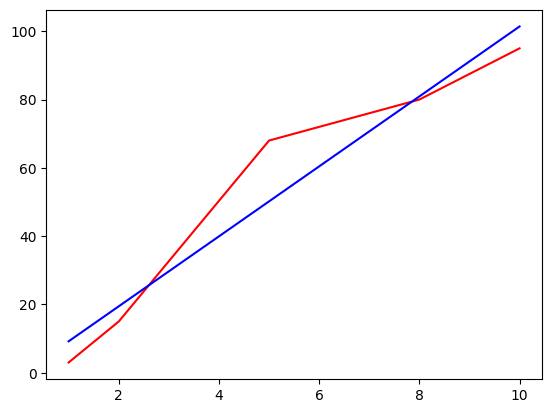

In [24]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data,y_hat, 'b')

In [25]:
# 라이브러리를 쓰고 표준화 (StandardScaler 이용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [26]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.2397584468126297, W:[1.382381], b:[0.06912126]
600째 : cost:0.07871083170175552, W:[1.0927641], b:[0.02079395]
1200째 : cost:0.06413588672876358, W:[1.0056368], b:[0.0062555]
1800째 : cost:0.06281694769859314, W:[0.9794273], b:[0.00188187]
2400째 : cost:0.06269757449626923, W:[0.97154236], b:[0.00056614]
3000째 : cost:0.06268677860498428, W:[0.9691704], b:[0.00017032]
3600째 : cost:0.06268580257892609, W:[0.968457], b:[5.1246167e-05]
4200째 : cost:0.06268571317195892, W:[0.968243], b:[1.542658e-05]
4800째 : cost:0.06268569082021713, W:[0.9681799], b:[4.649787e-06]
5400째 : cost:0.06268571317195892, W:[0.9681648], b:[1.4035953e-06]
6000째 : cost:0.06268571317195892, W:[0.9681648], b:[4.2450537e-07]
6600째 : cost:0.06268569827079773, W:[0.9681648], b:[1.3201013e-07]
7200째 : cost:0.06268569082021713, W:[0.9681648], b:[4.342998e-08]
7800째 : cost:0.06268569827079773, W:[0.9681648], b:[2.978023e-08]
8400째 : cost:0.06268569827079773, W:[0.9681648], b:[2.980258e-08]
9000째 : cost:0.06268569827

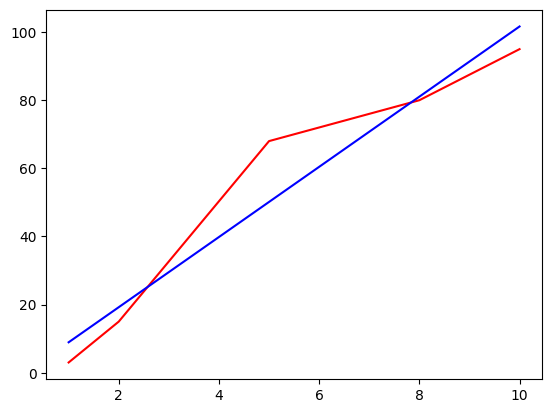

In [27]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

## 2.5 입력(독립)변수 x가 3개, 타겟(종속)변수 y가 1개 (csv)

In [31]:
# 방법 1: csv -> array
import numpy as np
data = np.genfromtxt('data/ozone.csv',
                     delimiter=',',
                     skip_header=1,
                     missing_values='NA',
                     filling_values=np.nan) # 결측치, header가 없어야 함
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [37]:
# 방법2 : csv파일 -> 데이터프레임 -> 결측치처리 -> 넘파이배열 -> 머신러닝
# 1. csv를 데이터프레임으로 읽기
import pandas as pd
data = pd.read_csv('data/ozone.csv', encoding='utf-8')
data.info() # Ozone, Solar.R 열에만 결측치
data.isna().sum() # 열별 결측치 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [40]:
# 2. 결측치 처리
# 결측치 처리 방법1 : 결측치가 있는 행을 제거
# data.dropna(how='any', axis=0, inplace=True)
# 결측치 처리 방법2 : 결측치 대체(열별 평균값으로 대체)
data.mean(axis=0)
# data.fillna(value=data.mean())
# 결측치 처리 방법3 : 결측치 대체(월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 :', mean_data.loc[5, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


5월에 Ozone으로 대체할 값 : 23.615384615384617


In [48]:
def fill_nan(row):
    # print(row['Ozone'], row['Solar.R'])
    # print(row.isna())
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
    row = row.copy()
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']
    return row
fill_nan(data.loc[4])

Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [49]:
def fill_nan(row):
    # Ozone과 Solar.R 값, 그리고 NaN여부 출력
    # print(row['Ozone'], row['Solar.R'])
    # print(row.isna())
    row = row.copy()
    # Ozone이 NaN이면 mean_data에서 대체
    if pd.isna(row['Ozone']):
        row['Ozone'] = mean_data.loc[row['Month'], 'Ozone']
    # Solar.R이 NaN이면 mean_data에서 대체
    if pd.isna(row['Solar.R']):
        row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']
    return row

# 예시로 mean_data가 index=Month, columns=['Ozone','Solar.R'] 형태여야 함
# mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()

# 한 행 테스트
fill_nan(data.loc[4])


Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [53]:
data = data.apply(fill_nan, axis=1)
X_data = data[['Solar.R', 'Wind', 'Temp']].values
y_data = data[['Ozone']].values
X_data.shape , y_data.shape

((153, 3), (153, 1))

In [54]:
print(data.isnull().sum())

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64


In [65]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                     y:y_data})
    if step%1000 ==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:11438.212890625
1000번째 cost:587.566162109375
2000번째 cost:524.3401489257812
3000번째 cost:492.6429748535156
4000번째 cost:476.7502136230469
5000번째 cost:468.7795715332031
6000번째 cost:464.780029296875
7000번째 cost:462.77093505859375
8000번째 cost:461.75970458984375
9000번째 cost:461.2486572265625
10000번째 cost:460.9882507324219


In [71]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:559.2736206054688
2000번째 cost:510.8553466796875
3000번째 cost:486.58056640625
4000번째 cost:474.4080505371094
5000번째 cost:468.3020935058594
6000번째 cost:465.2370300292969
7000번째 cost:463.69622802734375
8000번째 cost:462.91937255859375
9000번째 cost:462.525634765625
10000번째 cost:462.32379150390625
11000번째 cost:462.2182922363281
12000번째 cost:462.16094970703125
13000번째 cost:462.1278076171875
14000번째 cost:462.1067810058594
15000번째 cost:462.0919189453125
16000번째 cost:462.0799560546875
17000번째 cost:462.0697021484375
18000번째 cost:462.05999755859375
19000번째 cost:462.0508728027344
20000번째 cost:462.04180908203125
최종 cost:462.04180908203125, W:[[ 0.0553591 ]
 [-3.5846093 ]
 [ 0.86127156]], b:[-0.33354485]


In [73]:
np.column_stack([X_data, y_data])[:3]

array([[190. ,   7.4,  67. ,  41. ],
       [118. ,   8. ,  72. ,  36. ],
       [149. ,  12.6,  74. ,  12. ]])

In [74]:
# 예측하기
input_data = np.array([[118. ,   8. ,  72.]])
sess.run(H, feed_dict={X:input_data})

array([[39.533504]], dtype=float32)

### 스케일 조정
```
MinMaxScaler, StandardScaler
    0~1       -2~2 주로 0근처

```

In [75]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_X_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)
scaled_X_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [76]:
np.column_stack([scaled_X_data, scaled_y_data])

array([[0.55963303, 0.3       , 0.26829268, 0.23952096],
       [0.33944954, 0.33157895, 0.3902439 , 0.20958084],
       [0.43425076, 0.57368421, 0.43902439, 0.06586826],
       [0.93577982, 0.51578947, 0.14634146, 0.10179641],
       [0.5330162 , 0.66315789, 0.        , 0.13542146],
       [0.5330162 , 0.69473684, 0.24390244, 0.16167665],
       [0.89296636, 0.36315789, 0.2195122 , 0.13173653],
       [0.28134557, 0.63684211, 0.07317073, 0.10778443],
       [0.03669725, 0.96842105, 0.12195122, 0.04191617],
       [0.57186544, 0.36315789, 0.31707317, 0.13542146],
       [0.5330162 , 0.27368421, 0.43902439, 0.03592814],
       [0.76146789, 0.42105263, 0.31707317, 0.08982036],
       [0.86544343, 0.39473684, 0.24390244, 0.05988024],
       [0.81651376, 0.48421053, 0.29268293, 0.07784431],
       [0.17737003, 0.60526316, 0.04878049, 0.10179641],
       [1.        , 0.51578947, 0.19512195, 0.07784431],
       [0.91743119, 0.54210526, 0.24390244, 0.19760479],
       [0.21712538, 0.87894737,

In [88]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 50001):
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_X_data,
                                                    y:scaled_y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:0.9084620475769043
2000번째 cost:0.8535701632499695
3000번째 cost:0.8024670481681824
4000번째 cost:0.7548916935920715
5000번째 cost:0.7106025218963623
6000번째 cost:0.6693702340126038
7000번째 cost:0.6309747099876404
8000번째 cost:0.5952339172363281
9000번째 cost:0.5619531869888306
10000번째 cost:0.5309609770774841
11000번째 cost:0.5021079182624817
12000번째 cost:0.47524046897888184
13000번째 cost:0.4502195417881012
14000번째 cost:0.4269181191921234
15000번째 cost:0.40521588921546936
16000번째 cost:0.38500481843948364
17000번째 cost:0.3661843538284302
18000번째 cost:0.3486515283584595
19000번째 cost:0.33231353759765625
20000번째 cost:0.3171042203903198
21000번째 cost:0.3029268682003021
22000번째 cost:0.28972408175468445
23000번째 cost:0.27741336822509766
24000번째 cost:0.2659524381160736
25000번째 cost:0.25526589155197144
26000번째 cost:0.24530169367790222
27000번째 cost:0.23602275550365448
28000번째 cost:0.22737079858779907
29000번째 cost:0.2193029373884201
30000번째 cost:0.21177944540977478
31000번째 cost:0.2047629952430725
32000번

In [89]:
# 예측하기
input_data = np.array([[190. ,   7.4,  67.]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

array([[47.4369]], dtype=float32)

# 3. 이진분석 = logistic Regression (분류분석)
- logistic 회귀분석 : 기본의 회귀분서과 다른 처리 필요

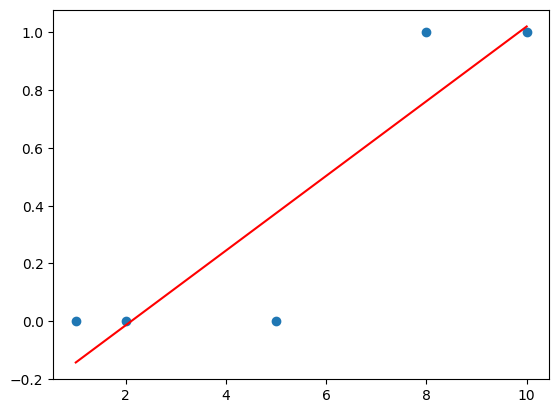

In [92]:
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) # 실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

In [109]:
# 교안 50p
import numpy as np
X_data = np.array([[10,0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0],])
# tensorflow 구현(tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개의 weight, bias
W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 24001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                     y:y_data})
    if step%800==0:
        print("{}번째 cost:{}".format(step, cost_val))
        

800번째 cost:0.4858922064304352
1600번째 cost:0.37949487566947937
2400번째 cost:0.3238816261291504
3200번째 cost:0.2904050052165985
4000번째 cost:0.2678489089012146
4800번째 cost:0.25135093927383423
5600번째 cost:0.23854351043701172
6400번째 cost:0.22815296053886414
7200번째 cost:0.21943725645542145
8000번째 cost:0.21193565428256989
8800번째 cost:0.20534683763980865
9600번째 cost:0.19946520030498505
10400번째 cost:0.19414545595645905
11200번째 cost:0.18928194046020508
12000번째 cost:0.18479573726654053
12800번째 cost:0.1806265413761139
13600번째 cost:0.1767275631427765
14400번째 cost:0.17306192219257355
15200번째 cost:0.16959968209266663
16000번째 cost:0.16631703078746796
16800번째 cost:0.16319391131401062
17600번째 cost:0.16021381318569183
18400번째 cost:0.15736304223537445
19200번째 cost:0.15462955832481384
20000번째 cost:0.15200361609458923
20800번째 cost:0.14947639405727386
21600번째 cost:0.14704041182994843
22400번째 cost:0.14468908309936523
23200번째 cost:0.1424165517091751
24000번째 cost:0.14021794497966766


In [110]:
# 모델 사용 # predict
input_data = np.array([[10, 0]])
predict = tf.cast(H>=0.5, dtype=tf.float32)
sess.run(predict, feed_dict={X:input_data})

array([[1.]], dtype=float32)

In [ ]:
# accuracy
correct = tf.equal(predict,y)
sess.run(correct, feed_dict={X:X_data,
                             y:y_data})

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#